## Introduction

This notebook will be doing Exploratory Analysis the data from https://ridesdatabase.org/saferparks/data/ for the 2018 NEISS Analysis that includes data from 2013-2017 for injuries sustained from different theme park rides.

The Data Dictionary can be found in the data folder, and it comes from the original website: https://www.cpsc.gov/Research--Statistics/NEISS-Injury-Data

In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

First, import the dataset. This was cleaned in notebook Capstone 2 - Data Wrangling.ipynb.

In [2]:
#Import cleaned data
data = pd.read_csv('data/clean_data/clean_data.csv')

Let's review the datatypes of the dataset. 

In [32]:
#Update the data type to Strings for Product Code as they are categories, not ints. 
data['ProductCode'] = data['ProductCode'].values.astype('str')

#product codes: 1293 (amusement devices), 3295 (water slides, public), and 3259 (go-karts).
#Update the product codes values to align with their actual meaning. 

#Create a dictionary for the product codes
product_codes = {'1293':'amusement devices (1293)', '3295': 'water slides, public (3295)', '3259':'go-karts (3259)'}

#Update the product code to the proper strings
data.replace(product_codes, inplace=True)

#View data types to make sure everything seems correct. 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6584 entries, 0 to 6583
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Treatment_Date    6584 non-null   datetime64[ns]
 1   Age               6584 non-null   int64         
 2   Sex               6584 non-null   object        
 3   Narrative         6584 non-null   object        
 4   Diagnosis         6584 non-null   object        
 5   Other_Diagnosis   986 non-null    object        
 6   BodyPart          6584 non-null   object        
 7   Disposition       6584 non-null   object        
 8   ProductCode       6584 non-null   object        
 9   Device_category   6584 non-null   object        
 10  Device_type       6584 non-null   object        
 11  Location          6584 non-null   object        
 12  Stratum           6584 non-null   object        
 13  PSU               6584 non-null   int64         
 14  Weight            6584 n

We see that most of the columns are objects which means they are categorical data. Only Age, PSU, Weight, and CPSC_Case_Number are numerical data. 

Let's review what the dataset looks like. 

In [33]:
#View the data
data.sample(5)

,Treatment_Date,Age,Sex,Narrative,Diagnosis,Other_Diagnosis,BodyPart,Disposition,ProductCode,Device_category,Device_type,Location,Stratum,PSU,Weight,CPSC_Case_Number
2227,2016-06-22,12,M,"12 YOM WAS STANDING ON THE BACK OF A GO-CART, ...",Fracture,NaN,"Arm, lower",Treated and released,go-karts (3259),Go karts,go kart,Unknown,C,90,4.5056,160725089
6231,2013-05-27,40,M,40YOM HAS SHOULDER PAIN AFTER RIDING GO-CART W...,"Strain, sprain",NaN,Shoulder,Treated and released,go-karts (3259),Go karts,go kart,Unknown,M,30,88.4147,130609875
900,2017-06-08,24,F,24 YO F C/O LT ANKLE PAIN EARLIER TODAY WAS WA...,"Strain, sprain",NaN,Ankle,Treated and released,amusement devices (1293),Inflatables,inflatable,Sports/recreation,L,51,67.2099,170634142
4342,2014-10-10,8,F,8YOF W/ BACK PAIN S/P RIDING A RIDE AT THE FAI...,Other,BACK PAIN,"Trunk, upper",Treated and released,amusement devices (1293),Amusement rides,amusement ride,Sports/recreation,C,8,5.7174,141050416
3004,2015-10-18,7,F,7 YO F WITH SWELLING TO HAND WHEN FELL JUMPING...,Other,TENDER,Hand,Treated and released,amusement devices (1293),Inflatables,inflatable,Unknown,C,37,5.6748,151063700


Some things to note, we see that the Narrative filed is looks like short descriptions of what happened that caused the injury. While that is useful information on a case by case basis, that will not help with the analysis of the dataset as a whole. We also see that there are some mising values in the Other_Diagnosis column, but we found in the previous data cleaning notebook that these missing values correspond to the "Other" field in Diagnosis. Most likley, this is reserved for uncommon Diagnosis and was a way to limit how many categories were in the Diagnosis column. It also looks like the weight column is in Kilograms. 

Now let's run some pairplots to see if there are any trends in our data. 

<Figure size 640x480 with 0 Axes>

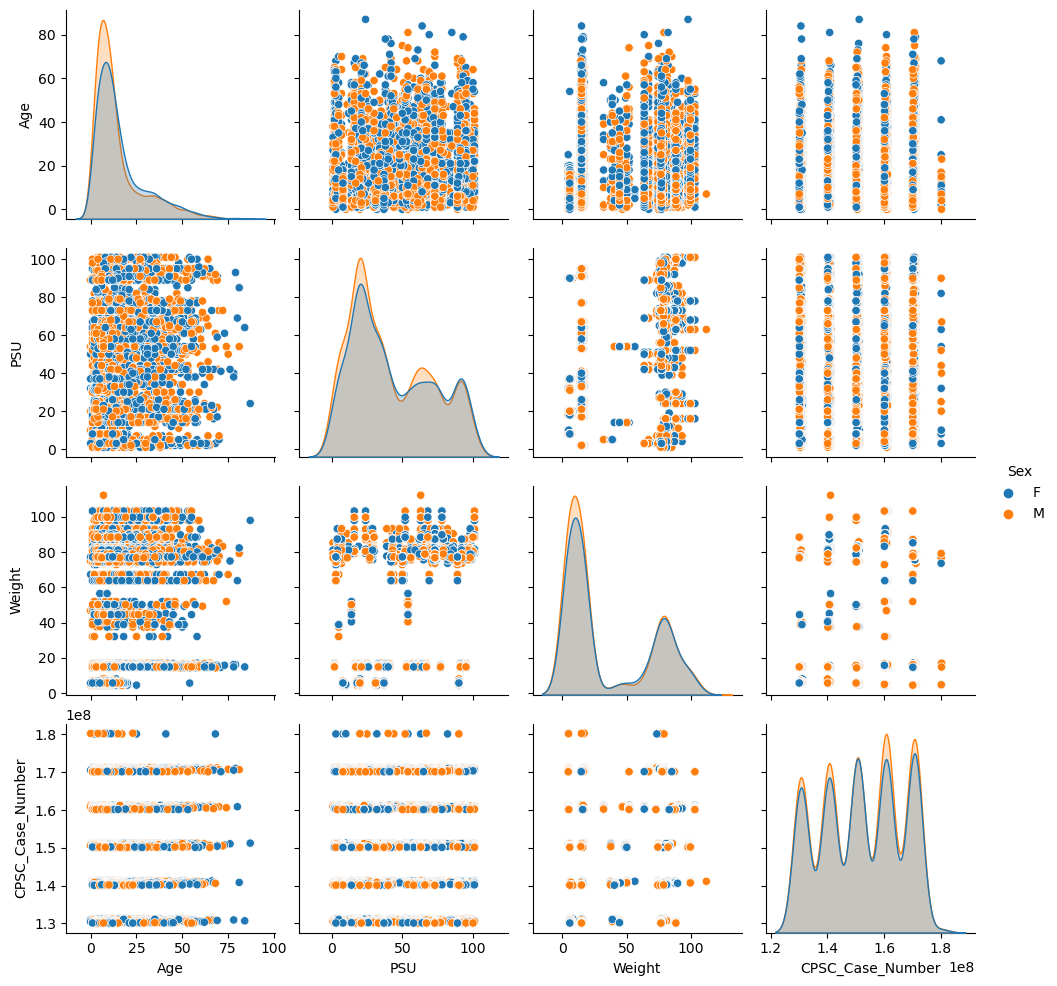

In [34]:
#Create a pairplot for continous variables. Nothing seems to be related. 
plt.clf()
sns.pairplot(data, hue='Sex')
plt.show()

When looking at the data through the lens of the gender of the injury, it looks like there are not any major trends. We see a slight increase in Males as opposed to Females at the peak of the histogram in the top left box. However, it is not clear if that is just the difference in the higher amount of Males in the data. 

<Figure size 640x480 with 0 Axes>

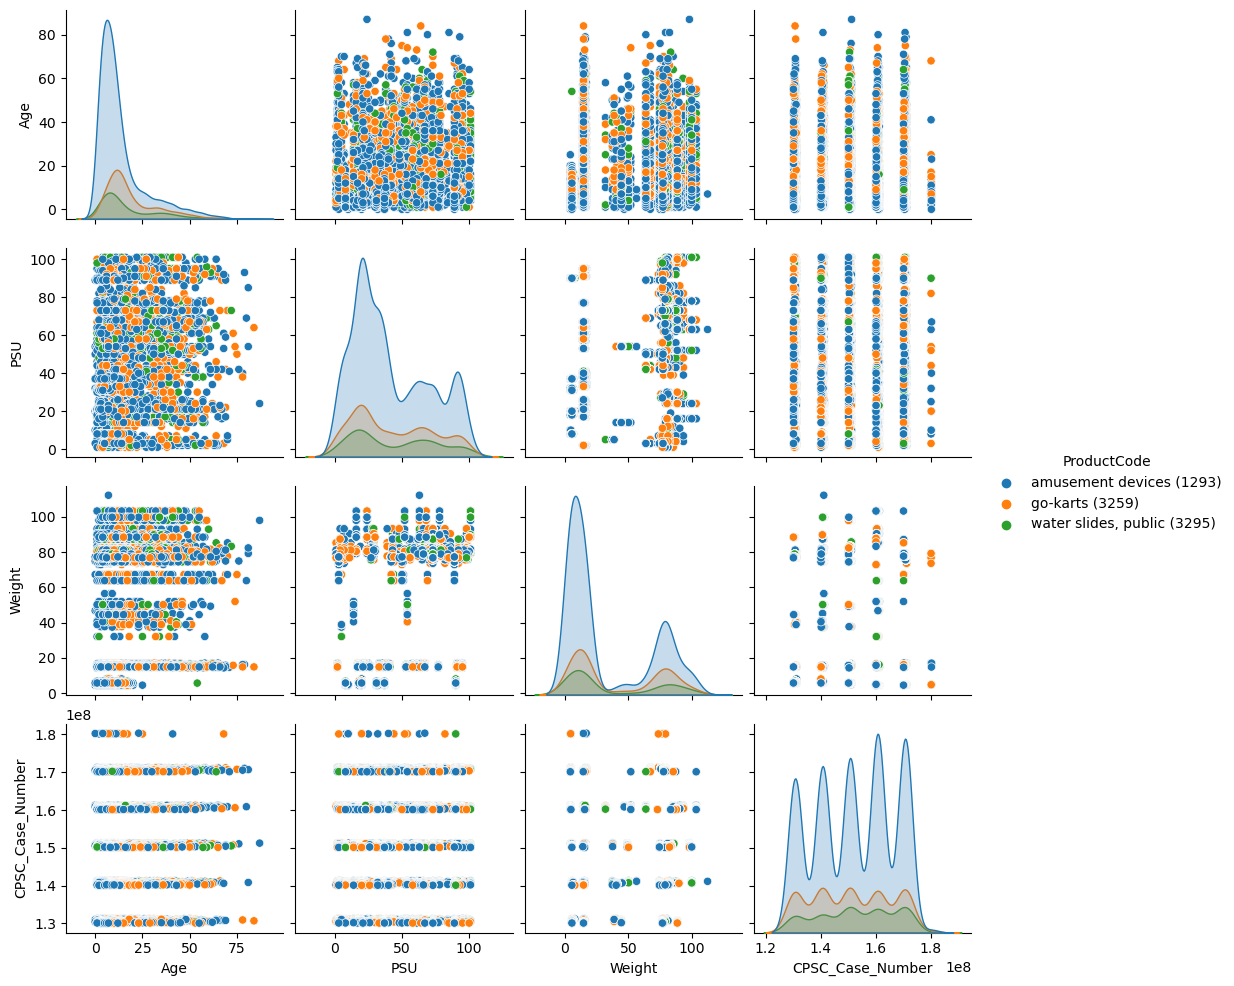

In [35]:
plt.clf()
sns.pairplot(data, hue='ProductCode')
plt.show()

With Product Code as the lens, we do see that Amusement Devices are by far the most common product where the injury occurs of the three. Other than that though, not much else to gleam from this plot. 

<Figure size 640x480 with 0 Axes>

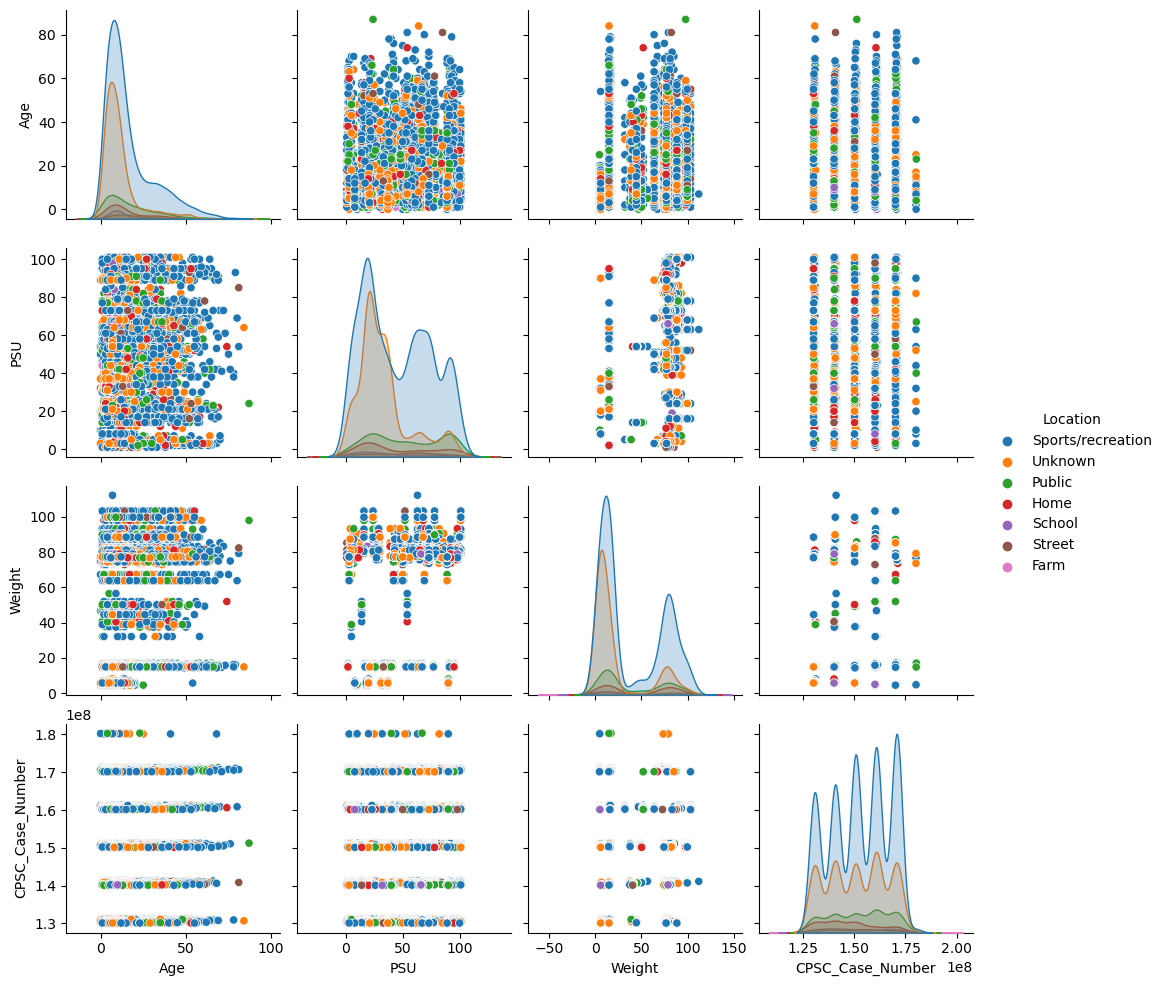

In [7]:
plt.clf()
sns.pairplot(data, hue='Location')
plt.show()

With Location as the lens, we can see some of the hierarchy between the different locations. Sports/recreation seem to be the highest, with Unknown coming in second and everything else is below that. No other notable trends to point out. 

<Figure size 640x480 with 0 Axes>

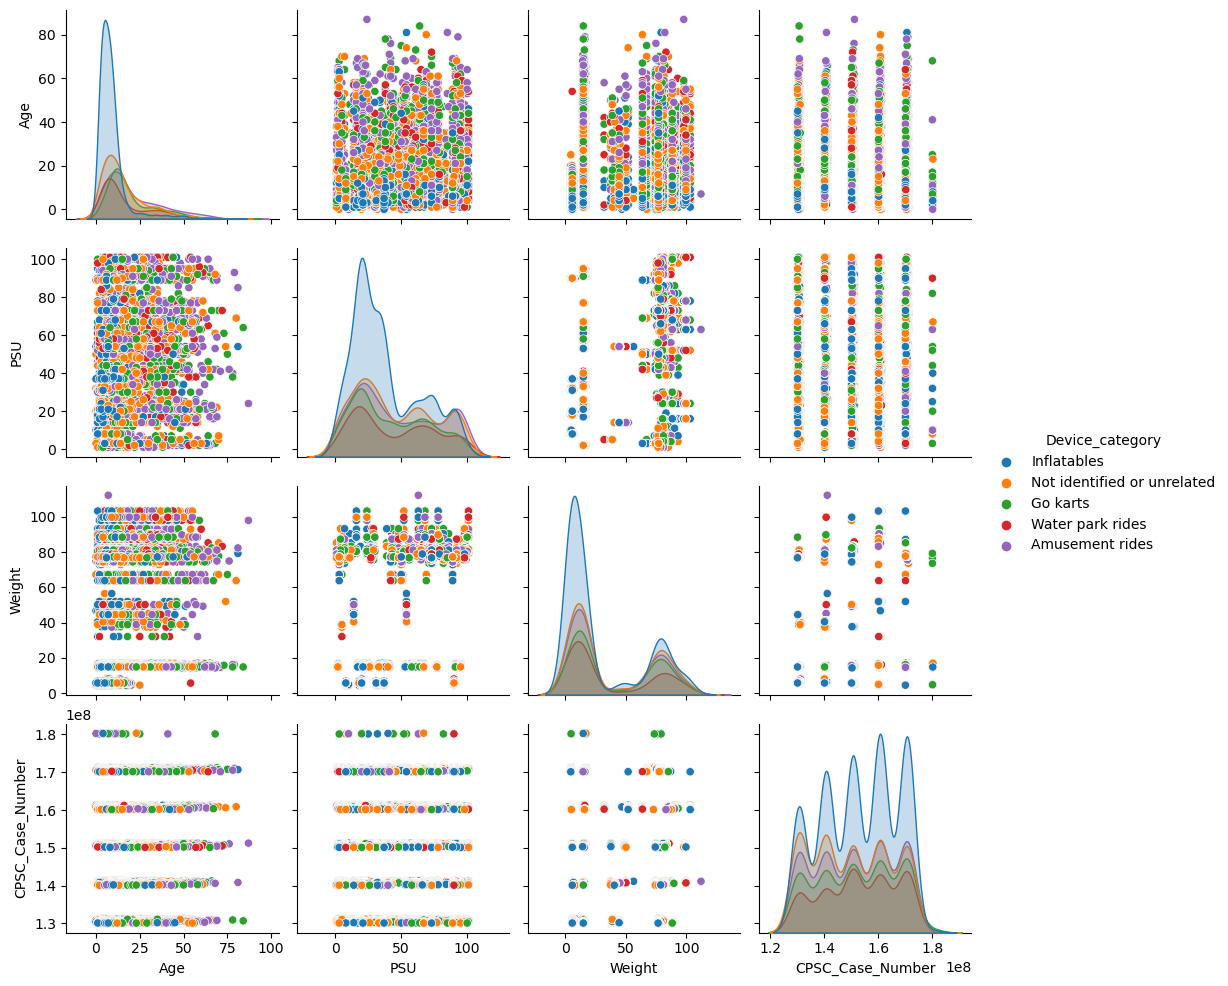

In [8]:
plt.clf()
sns.pairplot(data, hue='Device_category')
plt.show()

With Device_category, we see that Infaltables is the most common device the injuries occur on. The rest of them are relatively close to each other. 

<Figure size 640x480 with 0 Axes>

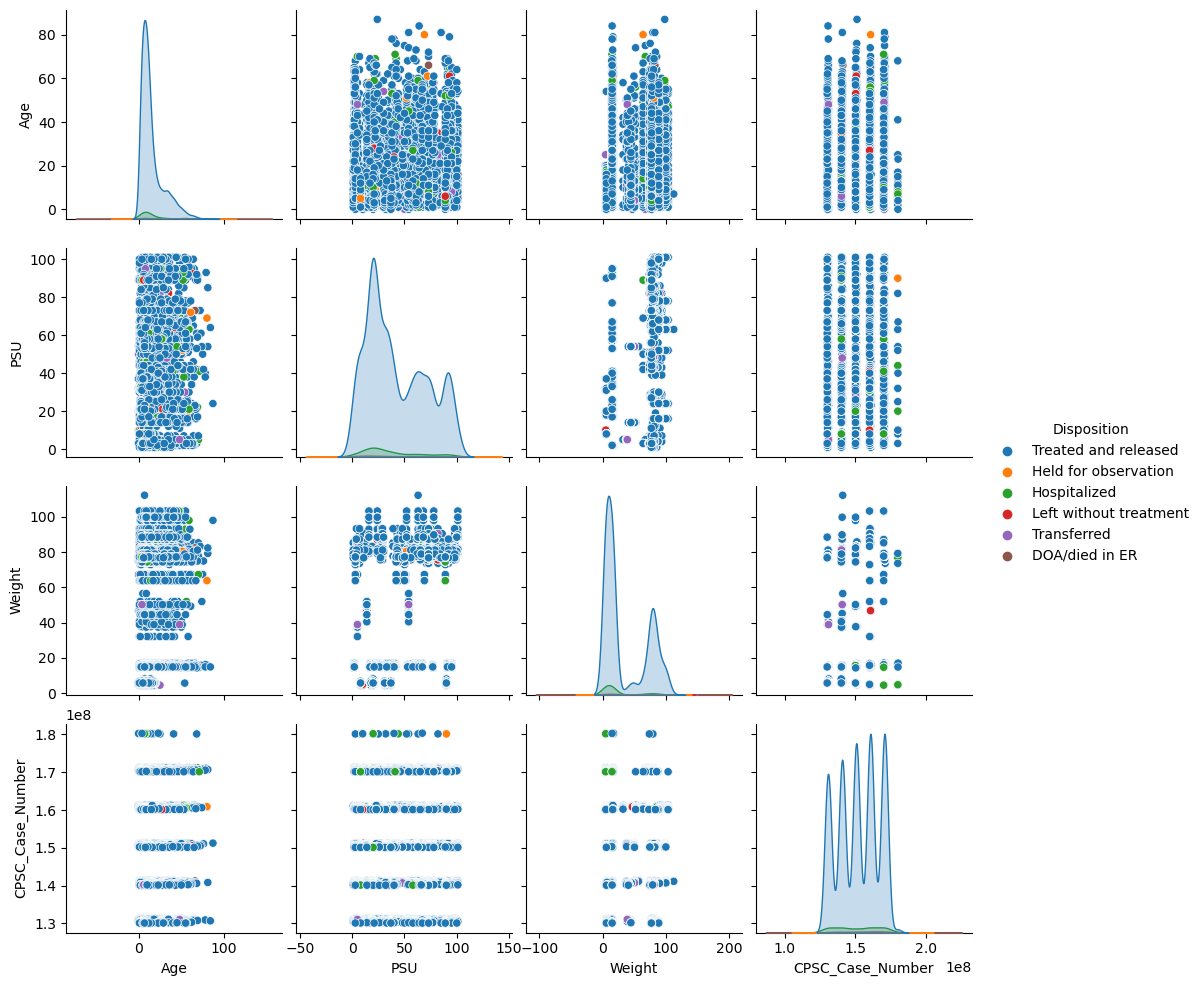

In [9]:
plt.clf()
sns.pairplot(data, hue='Disposition')
plt.show()

With Disposition, we see that Treated and released is by far the most common situation. With all the blue in all the plots, that is by far the most common outcome. 

In [11]:
#ECDF Function
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, len(x)+1) / n
    
    return x,y

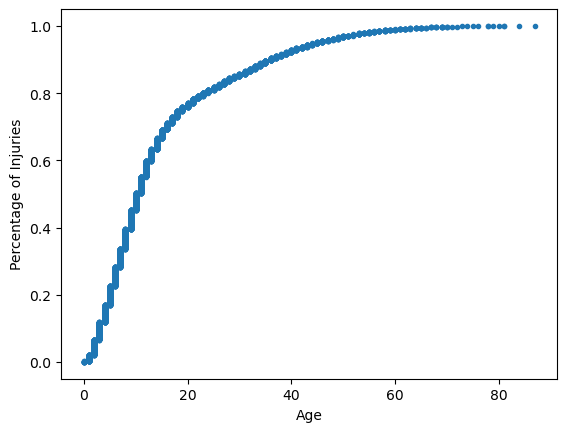

In [12]:
#Plot ECDF for Age. 
plt.clf()
x, y = ecdf(data['Age'])

_ = plt.plot(x, y, marker = '.', linestyle='none')
_ = plt.xlabel('Age')
_ = plt.ylabel('Percentage of Injuries')
plt.show()

Majority of injuries (around 80%) occur for people 20 and under. This matches what we saw in the above pairplots. 

<Figure size 640x480 with 0 Axes>

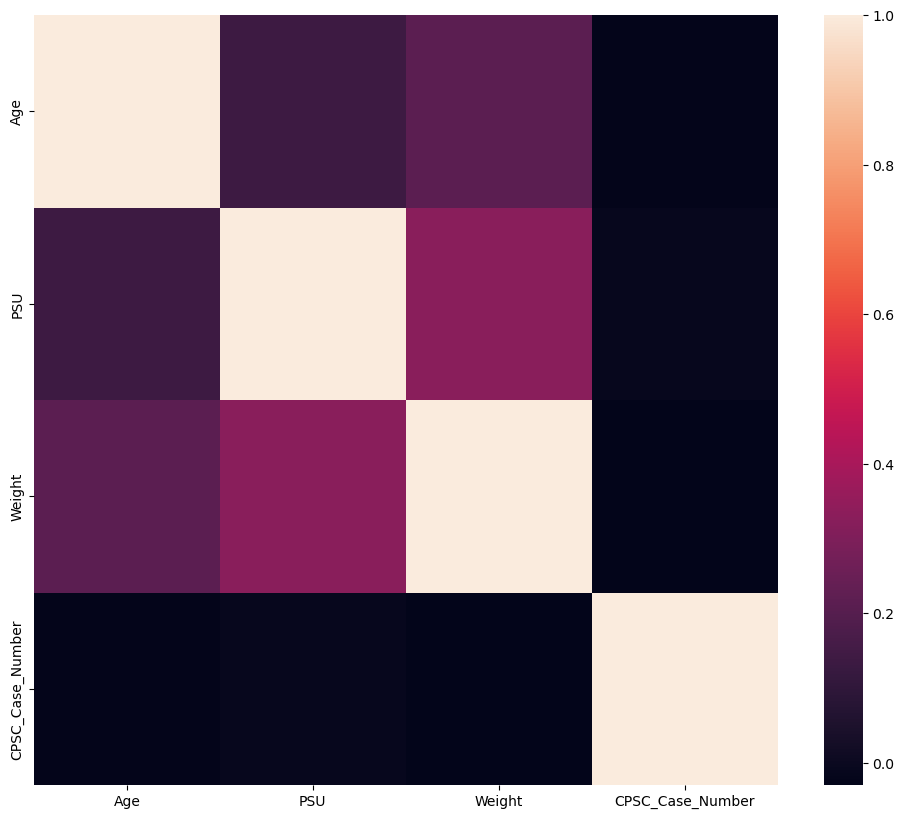

In [13]:
plt.clf()
plt.subplots(figsize=(12,10))
sns.heatmap(data.corr())
plt.show()

None of the continuous variables seem to be correlated to each other, which also confirms what we were seeing on the pairplots above. 

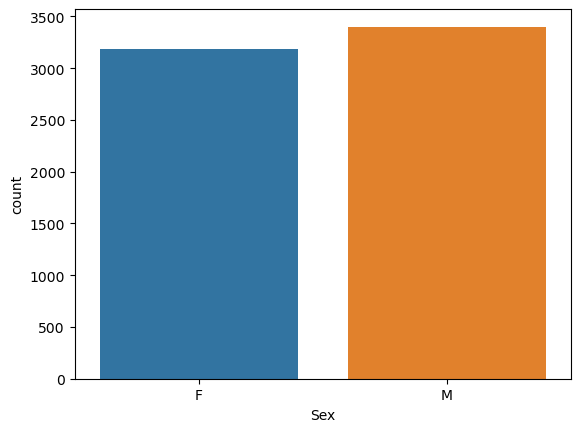

In [14]:
# Sex Count
#Pretty even distribution of males vs females with a slight majority to the males. 

sns.countplot(x='Sex', data= data)
plt.show()

We had seen in the pariplot above for Sex where there was a higher peak with the Males as opposed to the Females. This countplot confirms that there is a slight majority for Males in the data. 

In [ ]:
#Null Hypothesis. There is no statistical difference in the amount of Male and Females in the dataset. 
#Test statistic: p <0.05



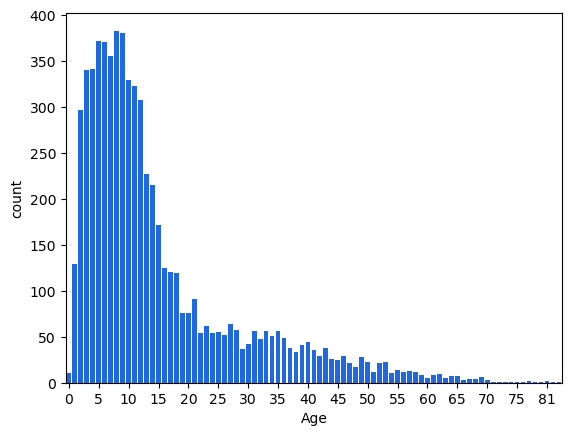

In [15]:
#Age Count
#A majority of the injuries are occuring in people under the age of 20. (Confirms what the ECDF found)

colors = ["#0060FF"]

sns.countplot(x='Age', data= data, palette = colors)
plt.xticks(ticks = np.arange(0, 85, step=5))
plt.show()

A majority of the injuries are occuring in people under the age of 20. This confirms what the ECDF found previously. 

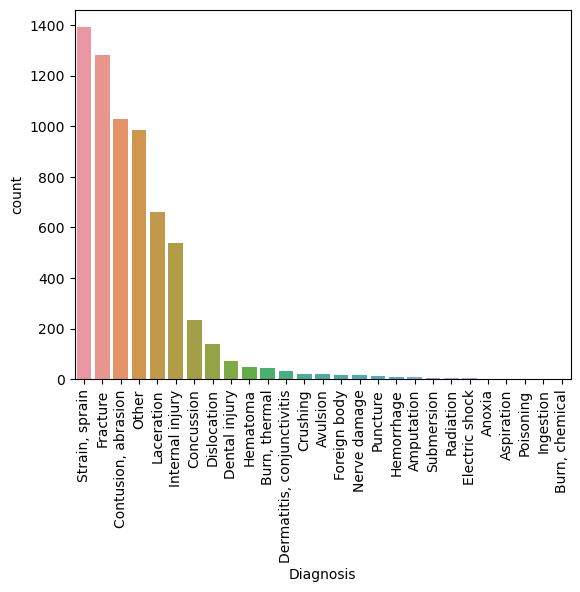

In [16]:
# Diganosis Count

sns.countplot(x='Diagnosis', data= data, order = data['Diagnosis'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

Strains/Sprains, Fractures, and Contusions are the most common Diagnosis of injuries.

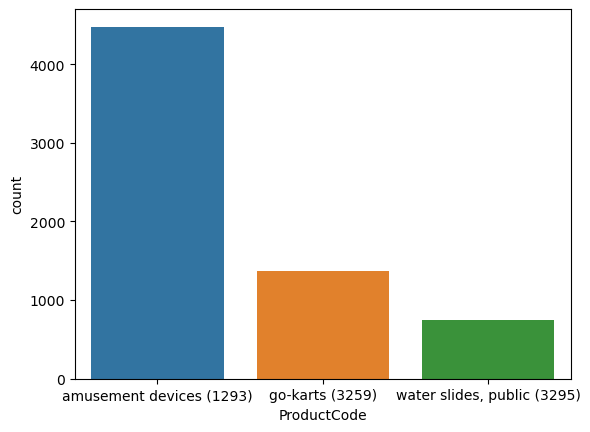

In [17]:
#Product Code Count
#product codes: 1293 (amusement devices), 3295 (water slides, public), and 3259 (go-karts).

sns.countplot(x='ProductCode', data= data)
plt.show()

Amusement devices have over 2/3 of the injury data in regards to Product codes. 

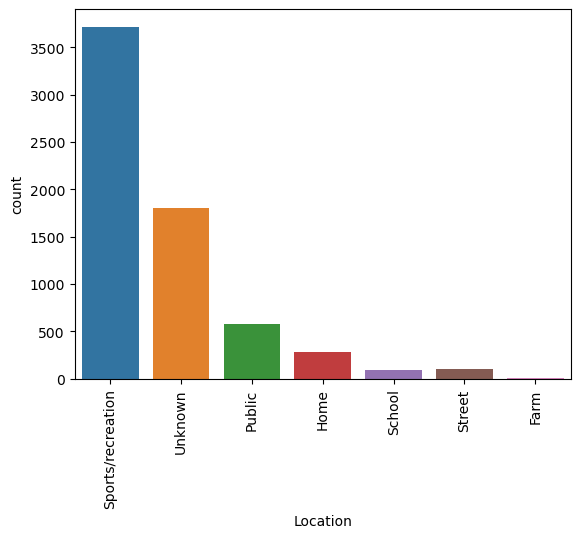

In [18]:
#Location Count. 

sns.countplot(x='Location', data= data)
plt.xticks(rotation=90)
plt.show()

Sports/Recreation is the most common place. However, there are also a lot of unknown. 

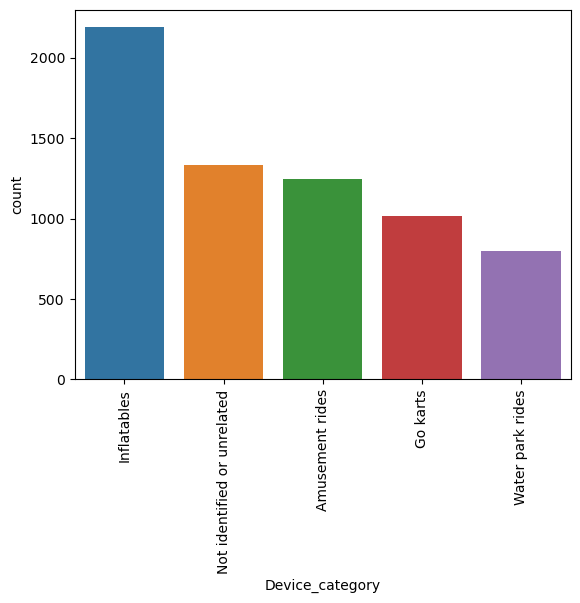

In [19]:
#Device Category Count. 

sns.countplot(x='Device_category', data= data, order = data['Device_category'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

Inflatables seems to be the most common injury type. There are a lot of unidentified ones as well. 

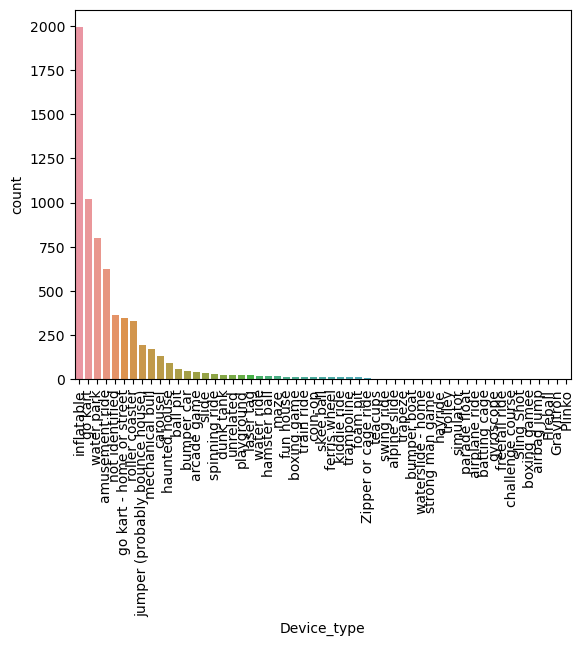

In [20]:
sns.countplot(x='Device_type', data= data, order = data['Device_type'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

Inflatables seem to be the most common device that an injury occurs on. Second would be go karts. 

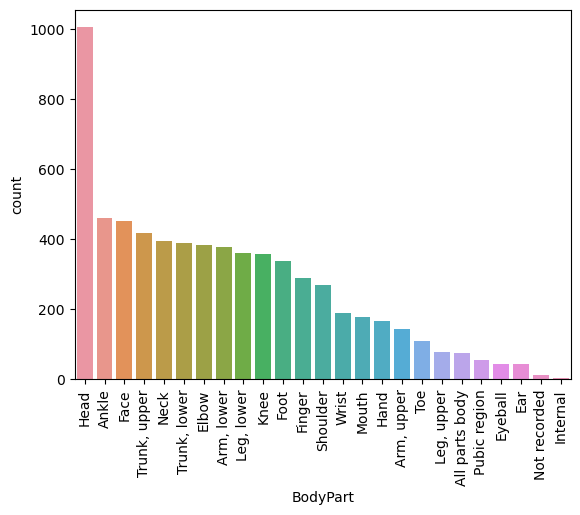

In [21]:
sns.countplot(x='BodyPart', data= data, order = data['BodyPart'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

Head Injuries are the most common. The top 3 and 4 out of the top 5 are to the head/neck area. 

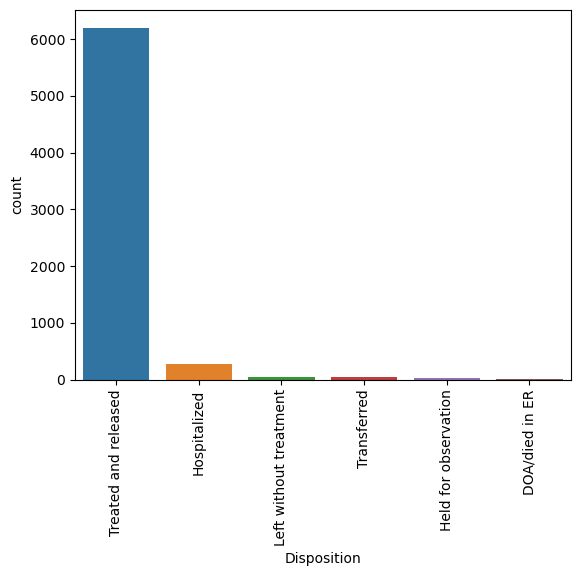

In [22]:
sns.countplot(x='Disposition', data= data, order = data['Disposition'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

A majority of the injuries appear to be minor.

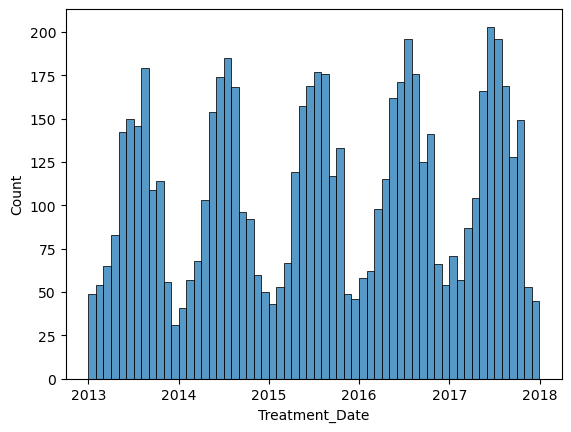

In [31]:
#Convert to Date Time Object
data['Treatment_Date'] = pd.to_datetime(data['Treatment_Date'])

sns.histplot(x='Treatment_Date', data= data, bins = 60)
plt.show()

This histogram shows that the majority of treatments occur in the months of May-Oct (5-10) each year. This makes sense since it would be the summer months and it is when kids are out of school and doing family vactions. 

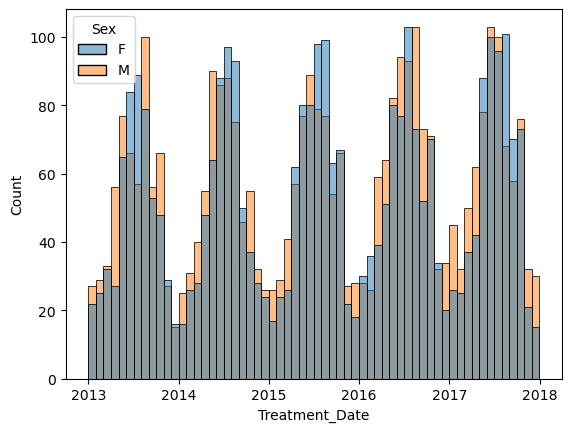

In [24]:
plt.clf()
sns.histplot(x='Treatment_Date', data= data, bins = 60, hue='Sex')
plt.show()

With Males vs Females over time, we don't see any major trends, just the slight majority of males for most of the data. 

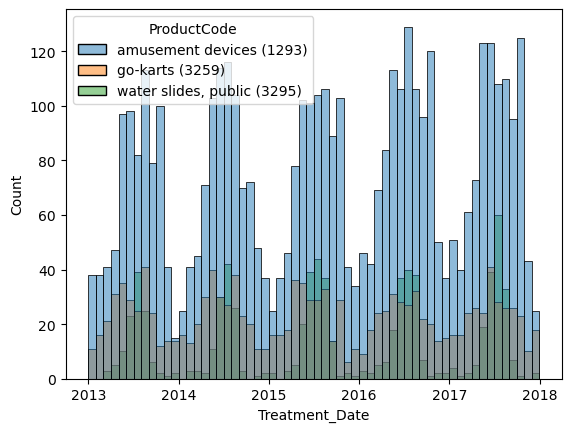

In [41]:
plt.clf()
sns.histplot(x='Treatment_Date', data= data, bins = 60, hue='ProductCode')
plt.show()

Not seeing any specific trends in regrads to time for the Product codes. They loosely follow the similar patterns of hightening in the Summer months. 

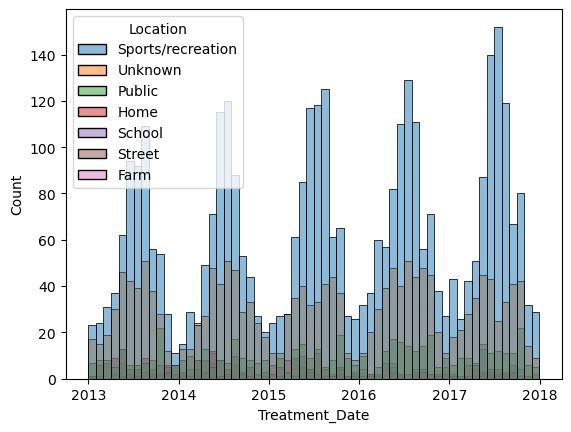

In [26]:
plt.clf()
sns.histplot(x='Treatment_Date', data= data, bins = 60, hue='Location')
plt.show()

Not seeing any specific trends for the Location either when it comes to time. 

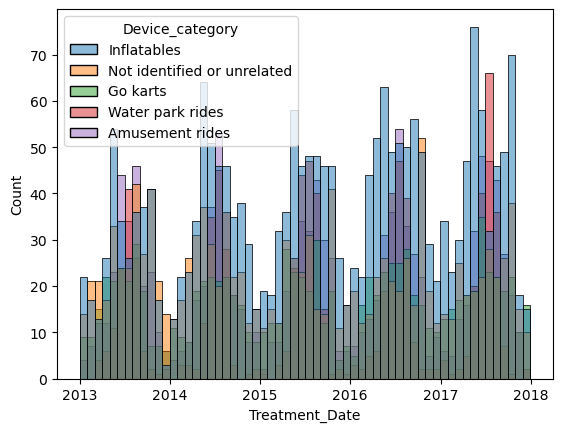

In [27]:
plt.clf()
sns.histplot(x='Treatment_Date', data= data, bins = 60, hue='Device_category')
plt.show()

Inflatables have the highest but we do the Water park rides overtake the Inflatables in some areas which would also make sense during the summer months. 

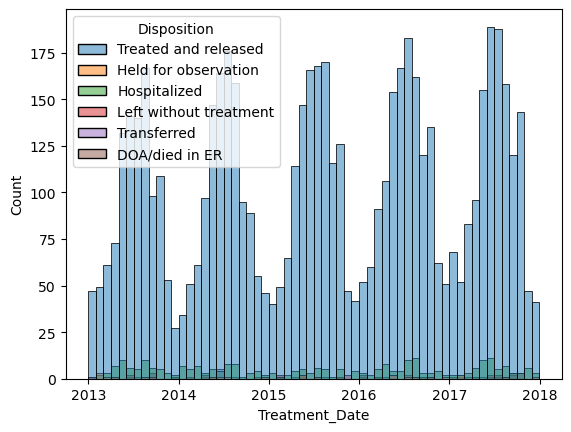

In [28]:
plt.clf()
sns.histplot(x='Treatment_Date', data= data, bins = 60, hue='Disposition')
plt.show()

With a majority of the dataset falling into the Treated and released category, it's no surprise that is by far the highest compared to everything else. This also follows the summer trend. 

## Conclusion

After reviewing the data points a bit further, we are seeing that most of the important data classifying the injuries are categorical apart from age. We see that slightly more males are affected than femailes, and a majority of the injuries happen to young people (under 20). Strains/Sprains, Fractures, and Contusions are the most common Diagnosis of injuries. Amusement Devices (Product Code) seem to be the cause of a majority of the injuries. Sports/Recreation is the most common Location. Inflatables are the most common Device Category and Device Type. Head injuries are the most common body part that is injured. A majority of the injuries appear to be minor as usually people are treated and released. We also see that a majority of the injuries occur in the summer months.  